In [1]:

from datetime import datetime

import torch
from torch.utils.data import DataLoader

from datasets.LabeledImageDataset import LabeledImageDataset
from models.resnet import Resnet18Model, Resnet50Model
from train import train_classifier
from utils import plot_model_metrics
from utils import reduce_dataset, split_dataset, undersample_dataset

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(f"Device: {device}")

batch_size = 256
dataset = LabeledImageDataset("data/candidates")
dataset = reduce_dataset(dataset, discard_ratio=0.0)
train_dataset, test_dataset = split_dataset(dataset, train_ratio=0.7)
# train_dataset = undersample_dataset(train_dataset)

train_loader = DataLoader(train_dataset,
                          batch_size=batch_size,
                          shuffle=True)
test_loader = DataLoader(test_dataset,
                         batch_size=batch_size,
                         shuffle=True, )

model = Resnet50Model( hidden_layers=1, units_per_layer=2048,
                      dropout=0.3, focal_alpha=0.9, focal_gamma=2.0)

print(f"Dataset: {len(train_dataset):,} training, {len(test_dataset):,} testing")


Device: cuda:0
Dataset: 14,158 training, 6,069 testing


In [2]:
print(model)

Resnet50Model(
  (pretrained_model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequent

In [3]:
print(f"Training starts {datetime.now().isoformat()}")

Training starts 2025-01-30T15:56:42.815431


In [4]:

model = model.to(device)
model, model_metrics = train_classifier(model, train_loader, test_loader, device,
                                        start_learning_rate=0.000075,
                                        max_epochs=5,
                                        checkpoint_every=1,
                                        eval_every=1)


Epoch 1 training: 100%|██████████| 56/56 [00:42<00:00,  1.31it/s]


Train: 1/5: lr: 0.000075000000 loss:0.01787688929055418


Epoch 1 testing: 100%|██████████| 24/24 [00:17<00:00,  1.38it/s]


Test: 1/5: loss:0.01365830823003004, accuracy:0.8534967411947513, precision:0.2552166476036582, recall:0.809213323411693, f1:0.3848278244431696, mcc:0.39896228140799733, ece:0.1465032584965229, epoch:0


Epoch 2 training: 100%|██████████| 56/56 [00:43<00:00,  1.29it/s]


Train: 2/5: lr: 0.000075000000 loss:0.012795839940996043


Epoch 2 testing: 100%|██████████| 24/24 [00:18<00:00,  1.31it/s]


Test: 2/5: loss:0.01209838199429214, accuracy:0.8759693686694291, precision:0.29218648063808383, recall:0.8271395910376174, f1:0.42811257080237786, mcc:0.4426294049508494, ece:0.12403063134600718, epoch:1


Epoch 3 training: 100%|██████████| 56/56 [00:44<00:00,  1.27it/s]


Train: 3/5: lr: 0.000075000000 loss:0.010959866182279907


Epoch 3 testing: 100%|██████████| 24/24 [00:18<00:00,  1.31it/s]


Test: 3/5: loss:0.01188485638704151, accuracy:0.9108513538789135, precision:0.35723979358141106, recall:0.7297978283756148, f1:0.47645477768179334, mcc:0.46887212663526306, ece:0.08914864575490355, epoch:2


Epoch 4 training: 100%|██████████| 56/56 [00:44<00:00,  1.25it/s]


Train: 4/5: lr: 0.000075000000 loss:0.00925079409665029


Epoch 4 testing: 100%|██████████| 24/24 [00:18<00:00,  1.27it/s]


Test: 4/5: loss:0.011696042182544867, accuracy:0.8760017409069981, precision:0.2989390573758591, recall:0.8597335602850308, f1:0.4391591697564496, mcc:0.4590498591819259, ece:0.1239982582628727, epoch:3


Epoch 5 training: 100%|██████████| 56/56 [00:45<00:00,  1.23it/s]


Train: 5/5: lr: 0.000075000000 loss:0.008052116575916963


Epoch 5 testing: 100%|██████████| 24/24 [00:18<00:00,  1.27it/s]


Test: 5/5: loss:0.012126627979644885, accuracy:0.8758111043968692, precision:0.2982239529380631, recall:0.8577933112579852, f1:0.43721173487888715, mcc:0.45705114002317093, ece:0.12418889626860619, epoch:4


Training ends 2025-01-30T16:01:57.048835
Test accuracy: 0.8758111043968692
Test precision: 0.2982239529380631
Test recall: 0.8577933112579852
Test f1: 0.43721173487888715
Test mcc: 0.45705114002317093


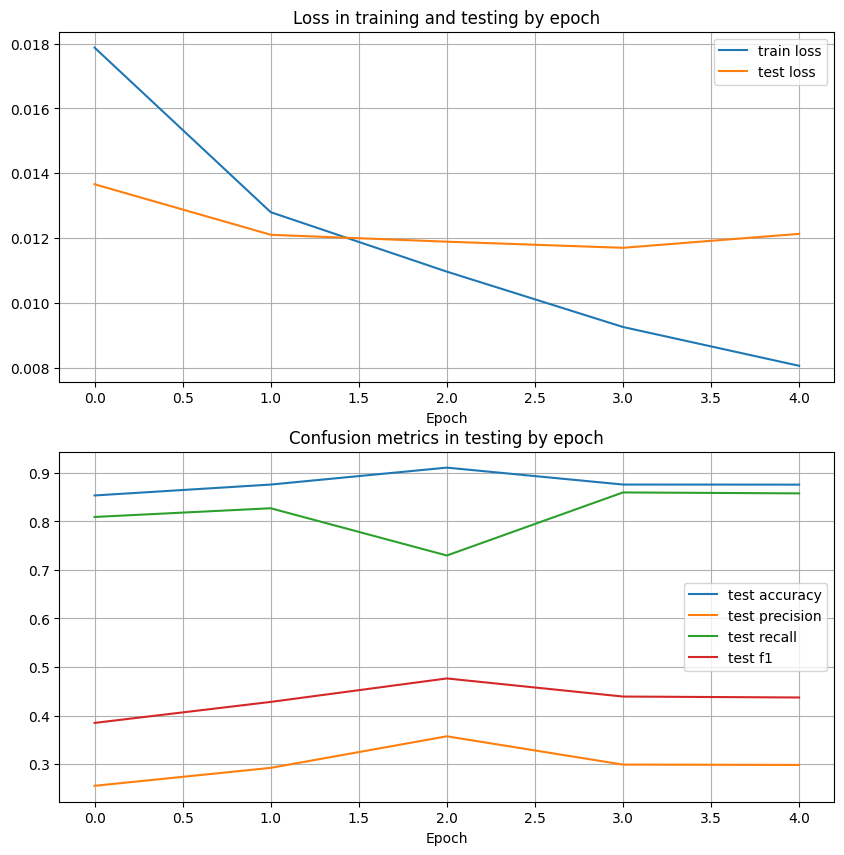

In [5]:

print(f"Training ends {datetime.now().isoformat()}")
for metric in ["accuracy", "precision", "recall", "f1", "mcc"]:
    if len(model_metrics[f"test_{metric}"]) > 0:
        print(f"Test {metric}:", model_metrics[f"test_{metric}"][-1])

plot_model_metrics(model_metrics)

In [6]:
torch.save(model, "model.pickle")